In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def load_fashion_mnist():
    """
    Loads Fashion MNIST dataset.
    
    Adapted from: https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
    """
    TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
    TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'    
    TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
    TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

    with gzip.open(TRAIN_LABELS, 'rb') as tr_labels_file, gzip.open(TEST_LABELS, 'rb') as ts_labels_file:
        train_labels = np.frombuffer(tr_labels_file.read(), dtype=np.uint8, offset=8)
        test_labels = np.frombuffer(ts_labels_file.read(), dtype=np.uint8, offset=8)

    with gzip.open(TRAIN_IMAGES, 'rb') as tr_images_file, gzip.open(TEST_IMAGES, 'rb') as ts_images_file:
        train_images = np.frombuffer(tr_images_file.read(), dtype=np.uint8, offset=16).reshape(len(train_labels), 784)
        test_images = np.frombuffer(ts_images_file.read(), dtype=np.uint8, offset=16).reshape(len(test_labels), 784)

    return train_images, train_labels, test_images, test_labels

In [2]:
def pretty_print(image_example):
    """ Pretty prints a Fashion MNIST example.

    Parameters:
        image_example: a 1x784 numpy array corresponding to the features of
                       a single image.

    Returns:
        None.
    """
    print(np.array_str(image_example, precision=1, max_line_width=116))

In [3]:
train_images, train_labels, test_images, test_labels = load_fashion_mnist()

In [4]:
print("Dimensions of training set feature matrix:", train_images.shape)
print("Dimensions of training set label matrix:", train_labels.shape)
EXAMPLE_INDEX = np.random.randint(60000)
print("Features of training example at index {}:\n".format(EXAMPLE_INDEX))
pretty_print(train_images[EXAMPLE_INDEX])

# And here's the label that goes with that training example
print("\nLabel of training example at index {}:".format(EXAMPLE_INDEX), train_labels[EXAMPLE_INDEX], '\n')
print(np.unique(train_labels))

Dimensions of training set feature matrix: (60000, 784)
Dimensions of training set label matrix: (60000,)
Features of training example at index 16349:

[  0   0   0   0   0   0   0   0   0   0  24  53  54  71 129  51  16  31   0   0   0   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 144 227 222 255 255 255 252 255 229 228  62   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   3   0  19 206 208 187 224 219 186 202 206 205 224 203  12   0   4   0   0   0   0   0
   0   0   0   0   0   0   4   0 124 195 195 212 174 201 220 228 185 202 208 213 139   0   1   0   0   0   0   0
   0   0   0   0   0   0   0   0  82 204 211 203 128 169 200 199 158 176 219 217 168   0   1   0   0   0   0   0
   0   0   0   0   1   0   0   0   0 161 191 130 125 102 160 109 117 127 185 180  11   0   2   0   0   0   0   0
   0   0   0   0   2   3   0   0  74 170 188 186 147 129 194 127 149 191 182 163  91   0   0   3   0   0   0   0
   0   0   0   0   1   5   0  77 186 157 130 125 185 147 

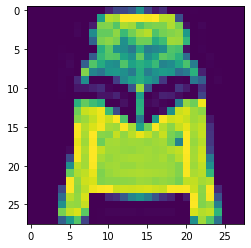

In [5]:
plt.figure()
plt.imshow(train_images[EXAMPLE_INDEX].reshape(28, 28))
plt.show()

[0 1 2 3 4 5 6 7 8 9]
(10,)


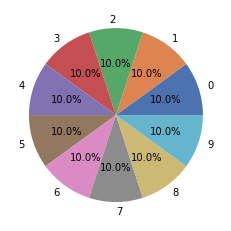

In [6]:
#looking at distribution of targets/labels 
labels = (np.unique(train_labels))
print(labels)
print(labels.shape)
percentages = []
for i in range(labels.size):
    count_labels = np.count_nonzero(train_labels == i)
    percentages.append((count_labels/train_labels.size)*100)
fig, ax = plt.subplots()
colorscale = sns.color_palette("deep")
ax.pie(percentages, labels=labels, autopct='%1.1f%%', colors = colorscale)
plt.show()

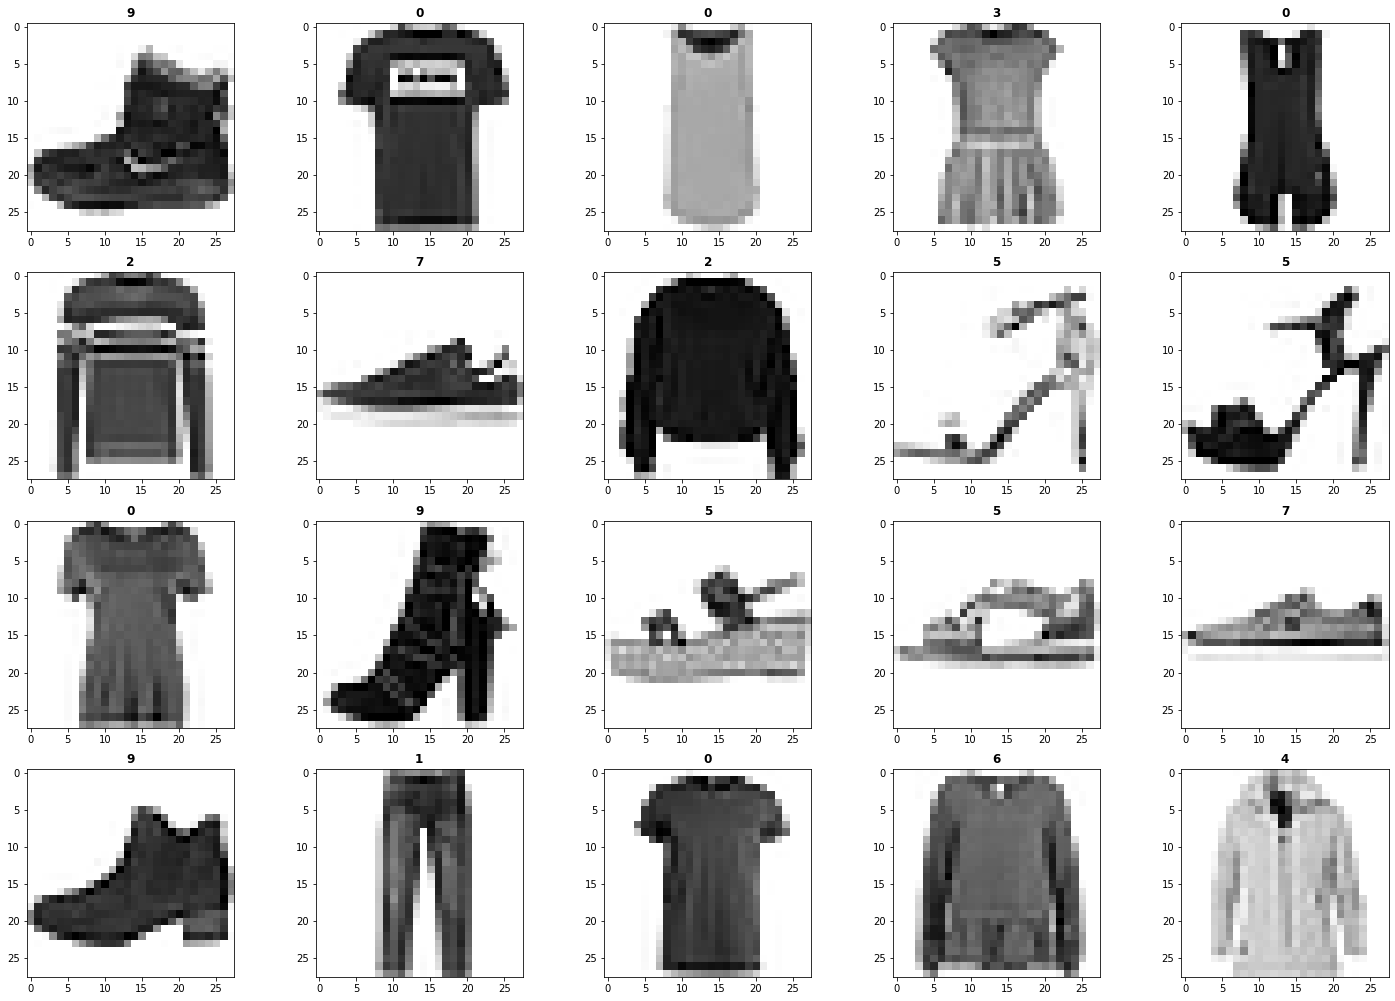

In [7]:
#visualizing the images

fig = plt.figure(figsize = (25,45))
fig.tight_layout()
Images = np.array(train_images)
for i in range(0,20):
    plt.subplot(10,5,i+1)
    image = Images[i].reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.title(labels[train_labels[i]], fontweight="bold")

[  0   0   0   0   0   0   0   0   0   0  24  53  54  71 129  51  16  31   0   0   0   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 144 227 222 255 255 255 252 255 229 228  62   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   3   0  19 206 208 187 224 219 186 202 206 205 224 203  12   0   4   0   0   0   0   0
   0   0   0   0   0   0   4   0 124 195 195 212 174 201 220 228 185 202 208 213 139   0   1   0   0   0   0   0
   0   0   0   0   0   0   0   0  82 204 211 203 128 169 200 199 158 176 219 217 168   0   1   0   0   0   0   0
   0   0   0   0   1   0   0   0   0 161 191 130 125 102 160 109 117 127 185 180  11   0   2   0   0   0   0   0
   0   0   0   0   2   3   0   0  74 170 188 186 147 129 194 127 149 191 182 163  91   0   0   3   0   0   0   0
   0   0   0   0   1   5   0  77 186 157 130 125 185 147 162 151 173 115 124 151 182 108   0   2   0   0   0   0
   0   0   0   0   2   2   0 208 115  99 133 136 127 104 158 109 130 141 135  91 104 163  23   0

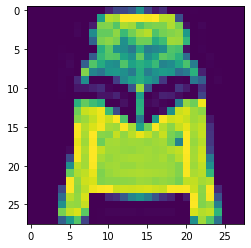

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.2 0.3 0.5 0.2 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.9 0.9 1.  1.  1.  1.  1.  0.9 0.9 0.2 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.8 0.8 0.7 0.9 0.9 0.7 0.8 0.8 0.8 0.9 0.8 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.8 0.8 0.8 0.7 0.8 0.9 0.9 0.7 0.8 0.8 0.8 0.5 0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.8 0.8 0.8 0.5 0.7 0.8 0.8 0.6 0.7 0.9 0.9 0.7 0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.7 0.5 0.5 0.4 0.6 0.4 0.5 0.5 0.7 0.7 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.7 0.7 0.7 0.6 0.5 0.8 0.5 0.6 0.7 0.7 0.6 0.4 0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.3 0.7 0.6 0.5 0.5 0.7 0.6 0.6 0.6 0.7 0.5 0.5 0.6 0.7 0.4 0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.8 0.5 0.4 0.5 0.5 0.5 0.4 0.6 0.4 0.5 0.6 0.5 0.4 0.4 0.6 0.1 0.  0.  0. 

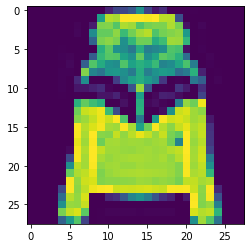

In [8]:
#MinMax Scaling
print(pretty_print(train_images[EXAMPLE_INDEX]))
print(train_images.shape)
plt.figure()
plt.imshow(train_images[EXAMPLE_INDEX].reshape(28, 28))
plt.show()
scaler = MinMaxScaler()
scaler.fit(train_images)
train_images = scaler.transform(train_images)
print(pretty_print(train_images[EXAMPLE_INDEX]))
print(train_images.shape)
plt.figure()
plt.imshow(train_images[EXAMPLE_INDEX].reshape(28, 28))
plt.show()

In [9]:
##We can remove features with low variance, set some variance threshold?
##scikitlearn has a library with classes to help with this
from sklearn.feature_selection import VarianceThreshold

In [10]:
selector = VarianceThreshold(threshold = 0.1)
new = selector.fit_transform(train_images)
new.shape


(60000, 402)

In [11]:
##Hard part is that not all features may be on same scale, so we should normalize? 

In [12]:
normal = train_images / np.mean(train_images)

In [13]:
selector = VarianceThreshold(threshold = 0.1)
new_normal = selector.fit_transform(normal)
new_normal.shape

(60000, 703)

In [14]:
#This may be more accurate

In [ ]:
# xx and yy are just to make it run faster 

Accuracies = []
K = []
xx = new[0:5000]
yy = train_labels[0:5000]
for k in range(1,31):
    if k%2 != 0:
        neighbors = KNeighborsClassifier(n_neighbors=k)
        neighbors.fit(xx, yy)
        scores = cross_val_score(neighbors, new, train_labels, cv = 10, scoring= 'accuracy')
        accuracy = scores.mean()
        Accuracies.append(accuracy)
        K.append(k)
print(Accuracies)
print(K)
plt.title('Graph of Accuracies vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(K, Accuracies, color = 'r')
plt.show()

{'classifier__n_neighbors': 5, 'selector__threshold': 0.01}
0      0.8038
1      0.8038
2      0.8036
3      0.8032
4      0.8032
        ...  
115    0.8004
116    0.7992
117    0.7962
118    0.7986
119    0.7910
Name: mean_test_score, Length: 120, dtype: float64


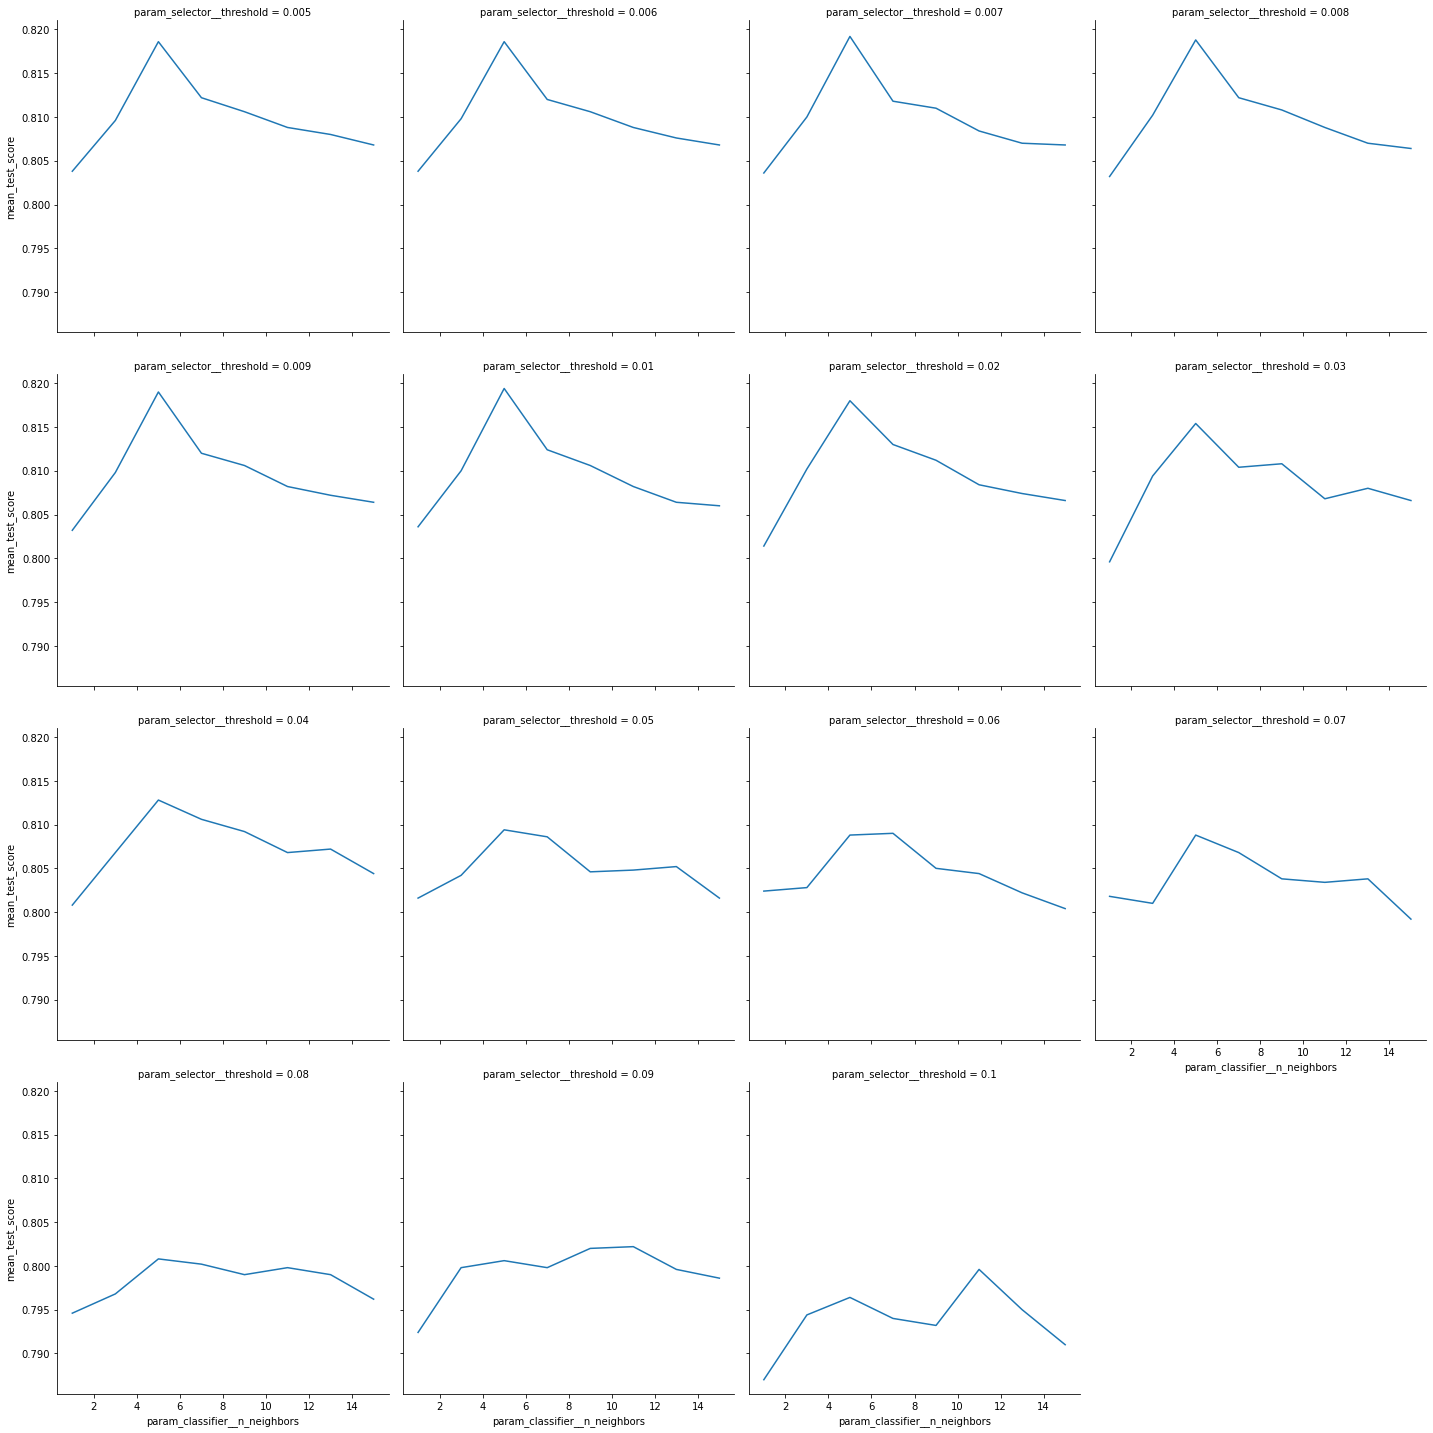

In [16]:
#pipeline to tune k and variance simaltaneously

#one thing I want to do is figure out how to label maximum value to make reading graphs easy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from pandas import DataFrame
pipe = Pipeline([
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])
xx = train_images[0:5000]
yy = train_labels[0:5000]
pipe.fit(xx, yy)
 
param = {
 'selector__threshold': [0.005, 0.006, 0.007, 0.008, 0.009, .01,.02, .03, .04, .05, .06, .07, .08, .09, .1],
 'classifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
}

grid = GridSearchCV(pipe, param, cv=10).fit(xx, yy)
best_params = grid.best_params_
print(best_params)

result_df = DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.mean_test_score)

sns.relplot(data=result_df,
 kind='line',
 x='param_classifier__n_neighbors',
 y='mean_test_score',
 col='param_selector__threshold',
 col_wrap=4)
plt.show()
#max mean test score : x.max()


In [ ]:
# ignore this ill delete it soon it was jsut me originally playing with grid search on k values and testing to see if the pipeline worked
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
model = KNeighborsClassifier() 
model.fit(train_images, train_labels) 
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
             }  
   
grid = GridSearchCV(KNeighborsClassifier(), param_grid, scoring = 'accuracy', refit = True ,n_jobs=-1) 
grid.fit(new, train_labels) 
print(grid.best_params_) 
grid_predictions = grid.predict(new) 
   
# print classification report 
print(classification_report(train_labels, grid_predictions)) 

In [24]:
#building dummy model
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(xx, yy)
dummy_clf.score(None, yy)
#This makes sense, should be around 10% since our 10 labels are evenly distributed

0.1112

http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/#
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/#


In [25]:
##Link above has lots of standard benchmarks
##Bottom link is the original data set paper